In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fuel-consumption/Fuel_Consumption_2000-2022.csv


In [2]:
df = pd.read_csv('/kaggle/input/fuel-consumption/Fuel_Consumption_2000-2022.csv')
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


# Data Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [4]:
df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


In [6]:
df['MAKE'].value_counts()

CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: MAKE, Length: 87, dtype: int64

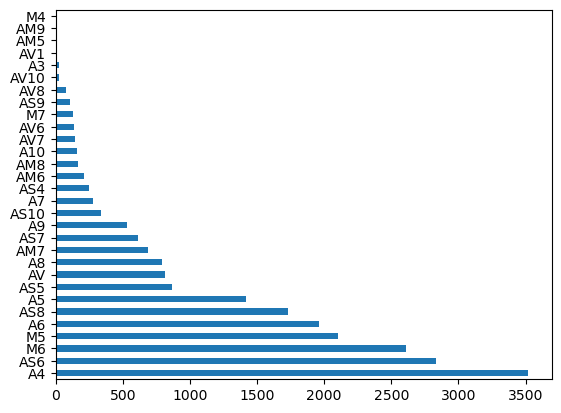

In [7]:
df['TRANSMISSION'].value_counts().plot.barh();

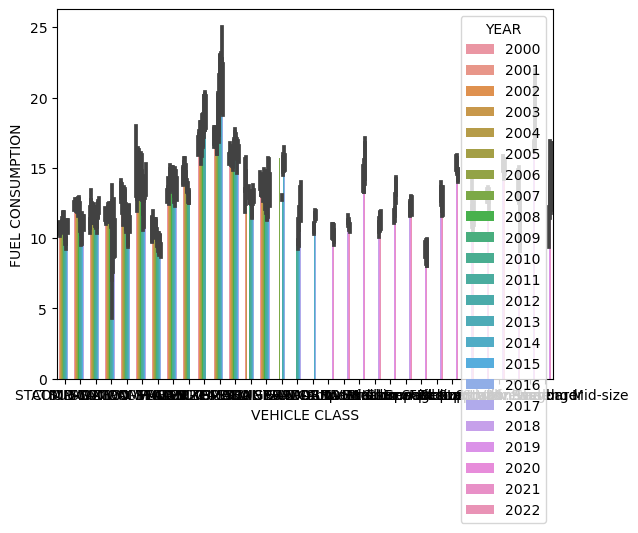

In [8]:
import seaborn as sns
sns.barplot(x = 'VEHICLE CLASS', y= 'FUEL CONSUMPTION',hue = 'YEAR' ,data = df);

In [9]:
x = df.drop(['MAKE','MODEL','VEHICLE CLASS','TRANSMISSION','FUEL','FUEL CONSUMPTION'],axis = 1)
X_ = df[['MAKE','MODEL','VEHICLE CLASS','TRANSMISSION','FUEL']]
dms = pd.get_dummies(X_)
X = pd.concat([x,dms],axis=1)
Y = df['FUEL CONSUMPTION']

In [10]:
X

,YEAR,ENGINE SIZE,CYLINDERS,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,MAKE_ACURA,MAKE_ALFA ROMEO,MAKE_ASTON MARTIN,...,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,2000,1.6,4,6.7,8.1,35,186,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2000,1.6,4,6.5,7.6,37,175,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2000,3.2,6,7.4,10.0,28,230,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2000,3.5,6,9.2,11.5,25,264,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2000,1.8,4,7.0,8.6,33,198,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,2.0,4,7.7,9.4,30,219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22552,2022,2.0,4,8.1,9.4,30,219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22553,2022,2.0,4,8.7,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22554,2022,2.0,4,8.4,10.1,28,236,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
Y

0         9.2
1         8.5
2        12.2
3        13.4
4        10.0
         ... 
22551    10.7
22552    10.5
22553    11.0
22554    11.5
22555    12.4
Name: FUEL CONSUMPTION, Length: 22556, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.35,random_state=42)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# 3 ML Models

## GBM

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train,y_train)
y_pred = gbr.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.2359640394185178

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = dt.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.09694510502454673

## CatBoost

In [17]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(verbose=False).fit(X_train,y_train)
y_pred = cat.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.10312205272363459

# Model Tuning

In [18]:
cat_params = {"iterations": [200,500,100],
              "learning_rate":[0.01,0.1],
              "depth":[3,6,8]}
cat_tuned = GridSearchCV(cat,cat_params,cv=5,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [19]:
cat_tuned.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.1}

In [20]:
final_cat = CatBoostRegressor(depth=8,iterations = 500, learning_rate = 0.1,verbose = False).fit(X_train,y_train)
y_pred = final_cat.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.10099151833455185

In [21]:
# 0.1031 -> 0.1009 I wanted to do tuning on catboost here. There was a small error, though.